# Part II - (ProsperLoanData)
## by (Raghad Altamrah)


## Dataset Overview

**Loan Data from Prosper: This data set contains 113,937 loans with 81 variables on each loan,
ncluding loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others**

**i will invstigate in specifec column which is**

**LoanOriginalAmount BorrowerAPR StatedMonthlyIncome TermProsperRating (Alpha) EmploymentStatus IncomeRange LoanStatus IncomeVerifiable**

**but i will slide the most intersting ones on it**




## Investigation Overview

- **in this slide show i will show the most count of  LoanStatus**

- **preform the distrubtion of the LoanOriginalAmount and what the transformtion that i made on it**

- **also knowing the StatedMonthlyIncome distrubtion and why to remove spicefc value form the varible**

- **and made a count plot for ProsperRating (Alpha) and order it from lowest to the highest to know the most and lowest**

- **see if the Term change along the ProsperRating (Alpha)**

- **what is the most of the EmploymentStatus that have IncomeVerifiable or not**

- **the most of EmploymentStatus that have  ProsperRating (Alpha)**


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')
df.shape

(113937, 81)

In [3]:
#Select the column that i want to use
my_col=df[['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term','ProsperRating (Alpha)','EmploymentStatus','LoanStatus','EmploymentStatusDuration','IncomeRange','IncomeVerifiable']]
my_col.head()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus,EmploymentStatusDuration,IncomeRange,IncomeVerifiable
0,9425,0.16516,3083.333333,36,NaN,Self-employed,Completed,2.0,"$25,000-49,999",True
1,10000,0.12016,6125.000000,36,A,Employed,Current,44.0,"$50,000-74,999",True
2,3001,0.28269,2083.333333,36,NaN,Not available,Completed,NaN,Not displayed,True
3,10000,0.12528,2875.000000,36,A,Employed,Current,113.0,"$25,000-49,999",True
4,15000,0.24614,9583.333333,36,D,Employed,Current,44.0,"$100,000+",True


In [4]:
# Remove loans with missing borrower APR information
my_col = my_col[~my_col.BorrowerAPR.isna()]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

 **the count of Loan Status**

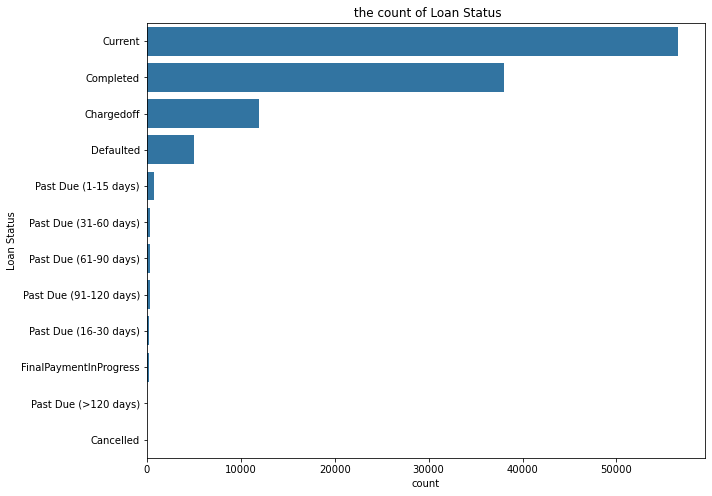

In [5]:
plt.figure(figsize=[10, 8])
base_color=sb.color_palette()[0]
LoanStatus_order=df["LoanStatus"].value_counts().index
sb.countplot(data=df , y='LoanStatus',color=base_color,order=LoanStatus_order)
plt.ylabel('Loan Status')
plt.title(' the count of Loan Status')
plt.show()

**i made this horizontal countplot to see the distrubtion of the olan stasues and oreder it from the max to the min number
so from the graph it's seems like we have for catgories is the most in the loan states which is	Chargedoff, Completed, Current and the  the others loan states  is less than 10000** 

## (Visualization 2)

**Distrubtion of Loan Original Amount**

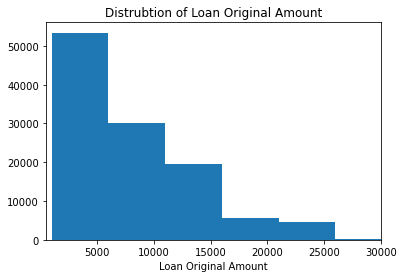

In [6]:
## let take a look about the
bins = np.arange(1000,my_col['LoanOriginalAmount'].max()+5000, 5000)
plt.hist(data=my_col,x="LoanOriginalAmount", bins = bins)
plt.xlabel('Loan Original Amount')
plt.title('Distrubtion of Loan Original Amount')
plt.xlim((500,30000));
plt.show()


**the graph is little bit skweed so i will do a log transformtion to see the result**

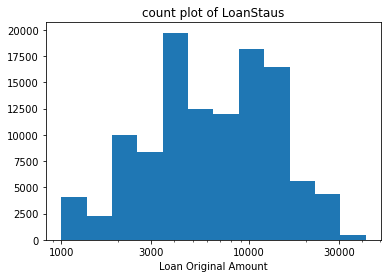

In [7]:
# Axis transformation

# Get the ticks for bins between [0 - maximum Loan amount]
bins = 10** np.arange(3, np.log10(my_col.LoanOriginalAmount.max())+0.135, 0.135)

# Generate the x-ticks you want to apply
ticks = [1000,3000, 10000, 30000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
# Plot the histogram
plt.hist(data=my_col, x='LoanOriginalAmount', bins=bins);
plt.xscale('log')
plt.xlabel('Loan Original Amount')
plt.title('count plot of LoanStaus');

# Apply x-ticks
plt.xticks(ticks, labels);

**first the graph looks like it's skweed so we well do a log transformtion to see , after the log transformation we see that the data have binmile model sence it's have tow peak the first one on 3000-4000 and the other one on 10000-20000** .

## (Visualization 3)

**Stated Monthly Income Distrubtion**

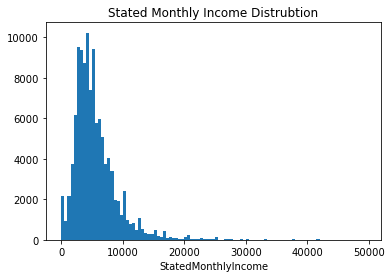

In [8]:
bins = np.arange(0,50000,500)
plt.hist(data=my_col,x='StatedMonthlyIncome',bins=bins)
plt.xlabel('StatedMonthlyIncome')
plt.title('Stated Monthly Income Distrubtion');

plt.show() 

**the StatedMonthlyIncome is have long trile skweed to right which mean the most of the income is less than 50000**

- **there is less than or equal to 0.31 percent from broweer take  less than 30000 monthly income**
- **sence the percent is less than 1% i will consider it as outlier and i will deleat it cause it will not effect**

## (Visualization 4)

**ProsperRating (Alpha) count**

In [10]:
order=['HR','E','D','C','B','A','AA']
rate_order =pd.api.types.CategoricalDtype(ordered=True,categories=order)
my_col['ProsperRating (Alpha)'] = my_col['ProsperRating (Alpha)'].astype(rate_order)

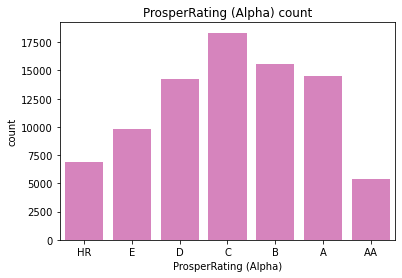

In [11]:
default_color = sb.color_palette()[6]
sb.countplot(data = my_col, x = 'ProsperRating (Alpha)',order=order, color = default_color);
plt.title('ProsperRating (Alpha) count');


**the most prosper Rating is from C to A and this have almost normal distrubtion**

## (Visualization 5)  have 3 Bivariate Exploration
- term  and ProsperRating (Alpha) 
- EmploymentStatu and IncomeVerifiable
- ProsperRating (Alpha) and EmploymentStatus

In [12]:
# you can add recomondation it's good
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
cat_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus','IncomeRange','LoanStatus','IncomeVerifiable']

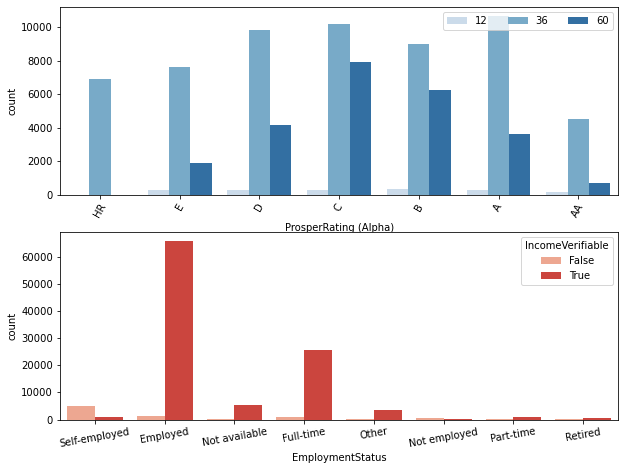

In [13]:
plt.figure(figsize = [10, 20])
Rotation=60
ncolno=5
# subplot 1: Prosper rating vs term
ax1= plt.subplot(5, 1, 1)
sb.countplot(data = my_col, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')
ax1.legend(loc = 1, ncol = ncolno) ;
plt.xticks(rotation=Rotation);
# subplot 2: employment status vs. term
ax = plt.subplot(5, 1, 2)
sb.countplot(data = my_col, x = 'EmploymentStatus', hue = 'IncomeVerifiable', palette = 'Reds')
plt.xticks(rotation=10)
ax1.legend(loc = 1, ncol = ncolno) ;


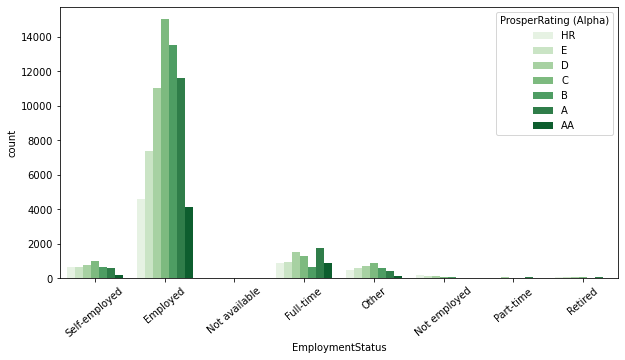

In [14]:
plt.figure(figsize = [10, 5])
# subplot 3: Prosper rating vs. employment status, use different color palette
sb.countplot(data = my_col, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
plt.xticks(rotation=40);
ax1.legend(loc = 1, ncol = ncolno) ;

- the highest term in all ProsperRating (Alpha) is 36
- the most of browwer they don't Verifiable thier Income is self-employed
-  the Employed is the higest Rating 

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [16]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 717903 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\raghad\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\raghad\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\raghad\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\raghad\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\raghad\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(note

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 